# import libraries

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlxtend

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Titanic(ap).csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [ ]:
titanic['Class'].value_counts()

Crew    885
3rd     706
1st     325
2nd     285
Name: Class, dtype: int64

# Pre-Processing
As the data is not in transaction formation We are using transaction Encoder

In [ ]:
df=pd.get_dummies(titanic)
df.head(),df.tail()

(   Class_1st  Class_2nd  Class_3rd  ...  Age_Child  Survived_No  Survived_Yes
 0          0          0          1  ...          1            1             0
 1          0          0          1  ...          1            1             0
 2          0          0          1  ...          1            1             0
 3          0          0          1  ...          1            1             0
 4          0          0          1  ...          1            1             0
 
 [5 rows x 10 columns],
       Class_1st  Class_2nd  Class_3rd  ...  Age_Child  Survived_No  Survived_Yes
 2196          0          0          0  ...          0            0             1
 2197          0          0          0  ...          0            0             1
 2198          0          0          0  ...          0            0             1
 2199          0          0          0  ...          0            0             1
 2200          0          0          0  ...          0            0             1
 
 [5 ro

# Apriori Algorithm

In [ ]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
# rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
2,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
3,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
4,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
...,...,...,...,...,...,...,...,...,...
69,"(Age_Adult, Survived_No)","(Class_Crew, Gender_Male)",0.653339,0.391640,0.304407,0.465925,1.189676,0.048533,1.139090
70,(Class_Crew),"(Age_Adult, Gender_Male, Survived_No)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
71,(Gender_Male),"(Class_Crew, Survived_No, Age_Adult)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622
72,(Survived_No),"(Class_Crew, Gender_Male, Age_Adult)",0.676965,0.391640,0.304407,0.449664,1.148157,0.039280,1.105434


In [ ]:
rules.sort_values('lift',ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
12,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
16,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
17,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
19,"(Survived_No, Class_3rd)",(Gender_Male),0.239891,0.786461,0.191731,0.799242,1.016252,0.003066,1.063667
20,(Gender_Male),"(Survived_No, Class_3rd)",0.786461,0.239891,0.191731,0.243790,1.016252,0.003066,1.005156
51,(Age_Adult),"(Gender_Male, Survived_No)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660
50,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
25,(Class_3rd),"(Age_Adult, Survived_No)",0.320763,0.653339,0.216265,0.674221,1.031961,0.006698,1.064097
22,"(Age_Adult, Survived_No)",(Class_3rd),0.653339,0.320763,0.216265,0.331015,1.031961,0.006698,1.015325


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30f5abbcd0>,
      dtype=object)

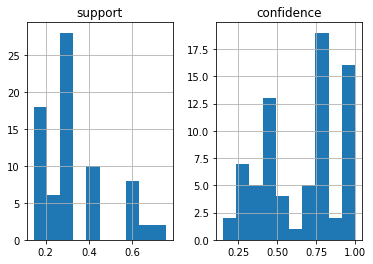

In [ ]:
rules[['support','confidence']].hist()
# plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30f54e5610>,
      dtype=object)

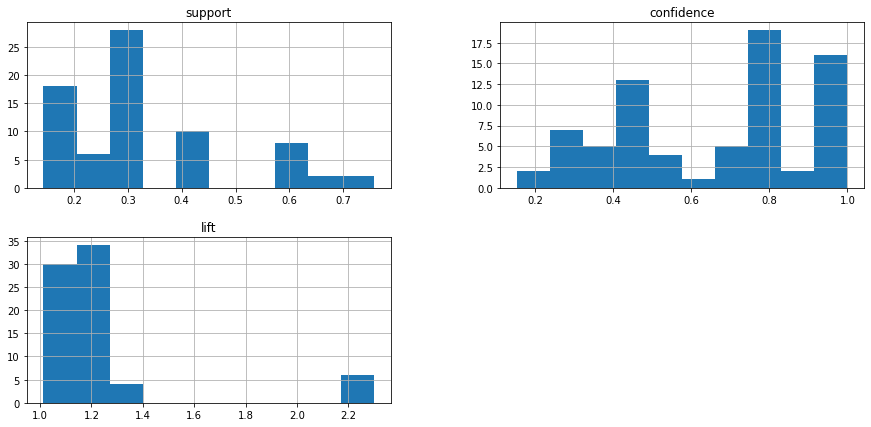

In [ ]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
# plt.show()

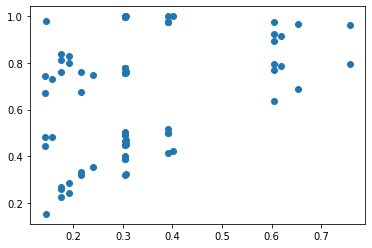

In [ ]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(rules['support'], rules['confidence'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


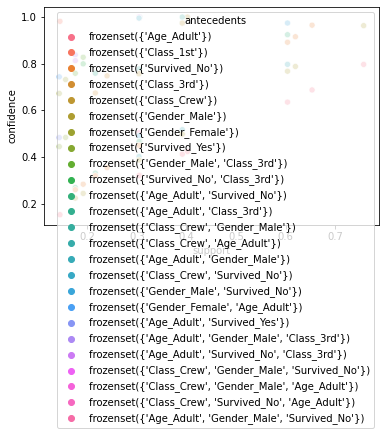

In [ ]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')

plt.show()

In [ ]:
!pip install nsepython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nsepython import *   
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [ ]:
oi_data, ltp, crontime = oi_chain_builder("RELIANCE","latest","full")
print(oi_data)
print(ltp)
print(crontime)

    CALLS_Chart  CALLS_OI  ...  PUTS_OI  PUTS_Chart
0           0.0       0.0  ...     29.0         0.0
1           0.0      16.0  ...    731.0         0.0
2           0.0       0.0  ...      0.0         0.0
3           0.0       0.0  ...      0.0         0.0
4           0.0       0.0  ...      0.0         0.0
..          ...       ...  ...      ...         ...
58          0.0      30.0  ...      4.0         0.0
59          0.0      42.0  ...      0.0         0.0
60          0.0     106.0  ...      0.0         0.0
61          0.0     749.0  ...      0.0         0.0
62          0.0    1030.0  ...      0.0         0.0

[63 rows x 23 columns]
2603.85
12-Sep-2022 14:54:55
